In [33]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn

In [34]:
# Read the Data
from scipy.io import loadmat

def read_HSI():
  X = loadmat('Indian_pines_corrected.mat')['indian_pines_corrected']
  y = loadmat('Indian_pines_gt.mat')['indian_pines_gt']
  print(f"X shape: {X.shape}\ny shape: {y.shape}")
  return X, y

X, y = read_HSI()

X shape: (145, 145, 200)
y shape: (145, 145)


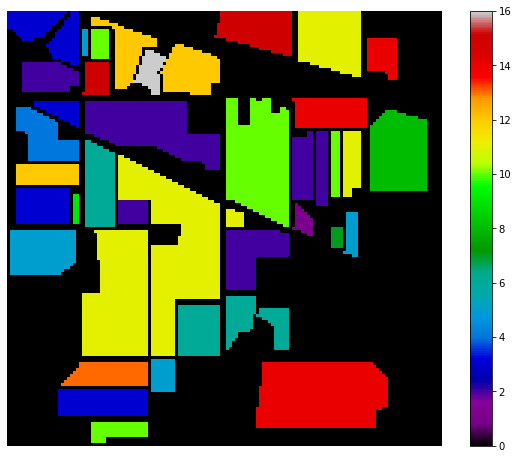

In [35]:
# Visualize the Ground Truth
plt.figure(figsize=(10, 8))
plt.imshow(y, cmap='nipy_spectral')
plt.colorbar()
plt.axis('off')
plt.show()

In [36]:
# Convert the dataset into csv
import pandas as pd
import numpy as np

def extract_pixels(X, y):
  q = X.reshape(-1, X.shape[2])
  df = pd.DataFrame(data = q)
  df = pd.concat([df, pd.DataFrame(data = y.ravel())], axis=1)
  df.columns= [f'band{i}' for i in range(1, 1+X.shape[2])]+['class']
  df.to_csv('Dataset.csv')
  return df
  
df = extract_pixels(X, y)
df.head()

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [37]:
# Remove class label 0 from the data
df_new = df[df['class']!=0]
df_new

,band1,band2,band3,band4,band5,band6,band7,band8,band9,band10,...,band192,band193,band194,band195,band196,band197,band198,band199,band200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20763,2732,4242,4113,4045,4510,4811,4812,4719,4631,4512,...,1078,1068,1077,1062,1050,1056,1039,1014,1008,10
20764,2561,4242,4290,4255,4520,4865,4918,4819,4908,4586,...,1084,1082,1101,1071,1057,1058,1054,1018,1004,10
20765,2564,4238,4290,4183,4634,4919,5085,4977,4841,4625,...,1091,1091,1096,1076,1061,1067,1042,1023,1018,10
20766,2735,4114,4295,4192,4643,4973,5052,4993,4912,4683,...,1089,1092,1102,1080,1066,1068,1041,1024,1018,10


In [38]:
#SVM

In [76]:
#importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

In [77]:
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)

In [78]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [79]:
#Training the SVM model on training set
from sklearn.svm import SVC
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)

SVC(C=100, cache_size=10240, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [80]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [81]:
##### Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  19    0    0    0    0    0    0    7    0    0    0    1    0    0
     0    0]
 [   0  747    7   12    0    0    0    0    0   27   61    3    0    0
     0    0]
 [   0   15  425   13    0    0    0    0    0    3   33    9    0    0
     0    0]
 [   0    3   24  105    0    1    0    1    0    2    5    1    0    0
     0    0]
 [   0    1    0    1  280    1    0    0    0    1    2    3    0    1
     0    0]
 [   0    0    0    0    4  429    0    0    0    0    0    0    0    1
     4    0]
 [   0    0    0    0    1    0   12    4    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    1    0    0  286    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    1    0    0    5    0    0    0    6    0
     0    0]
 [   0   23    1    1    0    3    0    0    1  487   65    2    0    0
     0    0]
 [   0   53   24    1    5    5    0    0    1   48 1328    6    0    0
     2    0]
 [   0    5    8    6    0    0    0    0    0    5   13  317    

0.8972357723577236

In [45]:
# Applying PCA with different prime components (p) on SVM rbf kernel

In [56]:
# p=5

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  10    0    0    0    0    0    0   16    0    0    1    0    0    0
     0    0]
 [   0  426   79   28    0    1    0    0    0   61  217   45    0    0
     0    0]
 [   0   86  274   15    0    1    0    0    0   14   86   22    0    0
     0    0]
 [   1   23   19   56    8    1    0    0    0    9   12   13    0    0
     0    0]
 [   0    3    0    1  247    5    0    0    0    1    5    1    0   14
    13    0]
 [   0    5    0    5    5  367    0    0    1    0    6    1    0   15
    33    0]
 [   1    0    0    0    1    0    7    8    0    0    0    0    0    0
     0    0]
 [  10    1    0    0    3    0    2  266    0    0    5    0    0    0
     0    0]
 [   0    0    0    0    1    2    0    0    4    0    0    0    3    0
     2    0]
 [   0   46   32   11    1    2    0    0    0  380   88   23    0    0
     0    0]
 [   0  124   63    6    4    8    1    0    0   95 1145   24    0    0
     3    0]
 [   0   81   30   14    1    0    0    0    0   35   76  117    

0.6884552845528455

In [57]:
# p=10

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  17    0    0    0    0    0    0    9    0    0    1    0    0    0
     0    0]
 [   0  600   22   13    0    0    0    0    0   53  128   40    1    0
     0    0]
 [   0   35  359   17    0    0    0    0    0   11   62   14    0    0
     0    0]
 [   0   14   21   82    0    1    0    1    0    1   12   10    0    0
     0    0]
 [   0    4    0    1  258    5    0    0    0    1    3    1    0    8
     9    0]
 [   0    1    0    3    2  387    0    0    0    0    1    0    0    9
    35    0]
 [   0    0    0    0    1    0   10    6    0    0    0    0    0    0
     0    0]
 [   6    0    0    0    5    0    1  273    0    0    2    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    7    0    0    0    4    0
     1    0]
 [   0   43   12    3    1    1    0    0    1  444   68   10    0    0
     0    0]
 [   0  151  101    5    4    8    0    0    1   66 1115   20    0    0
     2    0]
 [   0   67   25    6    1    0    0    0    0   18   53  184    

0.7665040650406504

In [58]:
# p=15

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 15)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  15    0    0    0    0    0    0   11    0    1    0    0    0    0
     0    0]
 [   0  605   18    8    0    0    0    0    0   49  140   36    1    0
     0    0]
 [   0   38  364   15    0    0    0    0    0   12   50   19    0    0
     0    0]
 [   0   20   14   84    1    1    0    1    0    3    8   10    0    0
     0    0]
 [   0    3    0    1  259    3    0    0    0    1    2    1    0   12
     8    0]
 [   0    0    0    2    6  409    0    0    0    0    1    0    0    5
    15    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   6    0    0    0    3    0    0  277    0    0    1    0    0    0
     0    0]
 [   0    0    0    0    0    1    0    0    6    0    0    0    5    0
     0    0]
 [   0   46    7    2    2    2    0    0    0  446   67   11    0    0
     0    0]
 [   0  135   90    1    3    8    0    0    1   66 1148   19    0    0
     2    0]
 [   0   69   32    4    1    0    0    0    0   18   35  195    

0.7839024390243903

In [59]:
# p=20

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 20)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  18    0    0    0    0    0    0    8    0    1    0    0    0    0
     0    0]
 [   0  621   16    9    0    0    0    0    0   51  131   28    1    0
     0    0]
 [   0   29  365   16    0    0    0    0    0   16   55   17    0    0
     0    0]
 [   0   21   18   85    1    1    0    1    0    3    6    6    0    0
     0    0]
 [   0    2    0    0  256    6    0    0    0    1    3    2    0   12
     8    0]
 [   0    1    0    2    5  414    0    0    0    0    0    0    0    3
    13    0]
 [   1    0    0    0    1    0   11    4    0    0    0    0    0    0
     0    0]
 [   7    0    0    0    2    0    0  277    0    0    1    0    0    0
     0    0]
 [   0    0    0    0    0    1    0    0    6    0    0    0    5    0
     0    0]
 [   0   56    6    1    2    2    0    0    0  434   73    9    0    0
     0    0]
 [   0  116   78    2    3    6    0    0    1   59 1195    9    0    0
     4    0]
 [   0   39   31    4    1    0    0    0    0   22   23  234    

0.8004878048780488

In [60]:
# p=25

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 25)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  16    0    0    0    0    0    0   10    0    1    0    0    0    0
     0    0]
 [   0  644   17   10    0    1    0    0    0   52  113   20    0    0
     0    0]
 [   0   35  367   15    0    0    0    0    0   10   54   17    0    0
     0    0]
 [   0   24   13   87    1    1    0    1    0    3    6    6    0    0
     0    0]
 [   0    2    0    1  261    4    0    0    0    1    2    2    0   14
     3    0]
 [   0    1    0    1    4  421    0    0    0    0    0    0    0    2
     9    0]
 [   1    0    0    0    1    0   12    3    0    0    0    0    0    0
     0    0]
 [   4    0    0    0    1    0    0  280    0    0    2    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    6    0
     0    0]
 [   0   52    4    1    2    2    0    0    0  448   63   11    0    0
     0    0]
 [   0  108   73    4    3    4    0    0    1   57 1207   11    0    0
     5    0]
 [   0   37   21    6    1    0    0    0    0   14   28  247    

0.8157723577235773

In [61]:
# p=30

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 30)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  17    0    0    0    0    0    0    9    0    1    0    0    0    0
     0    0]
 [   0  658   14    9    0    0    0    0    0   51  107   18    0    0
     0    0]
 [   0   27  371   19    0    0    0    0    0    7   54   20    0    0
     0    0]
 [   0   12   18   94    0    1    0    1    0    2    7    7    0    0
     0    0]
 [   0    1    0    0  266    5    0    0    0    1    3    2    0    9
     3    0]
 [   0    1    0    1    4  418    0    0    0    0    0    0    0    2
    12    0]
 [   1    0    0    0    1    0   12    3    0    0    0    0    0    0
     0    0]
 [   4    0    0    0    1    0    0  280    0    0    2    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    6    0
     0    0]
 [   0   48    3    1    1    2    0    0    1  455   62   10    0    0
     0    0]
 [   0  114   49    4    4    7    0    0    0   49 1235    8    0    0
     3    0]
 [   0   28   20    8    1    0    0    0    0   10   26  261    

0.8297560975609756

In [62]:
# p=35

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 35)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  16    0    0    0    0    0    0   10    0    1    0    0    0    0
     0    0]
 [   0  677   11   10    0    0    0    0    0   43   98   18    0    0
     0    0]
 [   0   32  370   17    0    0    0    0    0    5   57   17    0    0
     0    0]
 [   0   11   18   95    0    1    0    1    0    3    6    7    0    0
     0    0]
 [   0    2    0    0  268    5    0    0    0    1    2    2    0    8
     2    0]
 [   0    1    0    1    4  419    0    0    0    0    0    0    0    3
    10    0]
 [   1    0    0    0    1    0   12    3    0    0    0    0    0    0
     0    0]
 [   4    0    0    0    2    0    0  280    0    0    1    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    7    0    0    0    5    0
     0    0]
 [   0   44    3    1    1    2    0    0    1  457   63   11    0    0
     0    0]
 [   0   99   51    3    4    7    0    0    1   50 1245   10    0    0
     3    0]
 [   0   17   16    7    1    0    0    0    0    8   20  284    

0.8413008130081301

In [63]:
# p=40

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  16    0    0    0    0    0    0   10    0    1    0    0    0    0
     0    0]
 [   0  685   10   12    0    0    0    0    0   40   93   17    0    0
     0    0]
 [   0   27  383   17    0    0    0    0    0    5   45   21    0    0
     0    0]
 [   0   12   24   94    0    1    0    1    0    1    4    5    0    0
     0    0]
 [   0    2    0    1  270    5    0    0    0    0    4    1    0    5
     2    0]
 [   0    0    0    2    4  420    0    0    0    0    0    0    0    3
     9    0]
 [   0    0    0    0    1    0   12    4    0    0    0    0    0    0
     0    0]
 [   4    0    0    0    2    0    0  280    0    0    1    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    6    0
     0    0]
 [   0   34    2    1    0    2    0    0    1  472   60   11    0    0
     0    0]
 [   0   98   44    3    4    7    0    0    1   58 1248    7    0    0
     3    0]
 [   0   15   16    8    1    0    0    0    0    9   13  291    

0.8505691056910569

In [64]:
# p=45

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 45)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  18    0    0    0    0    0    0    8    0    1    0    0    0    0
     0    0]
 [   0  690   13   10    0    0    0    0    0   42   89   13    0    0
     0    0]
 [   0   21  394   16    0    0    0    0    0    5   44   18    0    0
     0    0]
 [   0   10   25   92    0    1    0    1    0    3    5    5    0    0
     0    0]
 [   0    3    0    0  272    5    0    0    0    0    2    3    0    3
     2    0]
 [   0    0    0    0    4  423    0    0    0    0    0    0    0    3
     8    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   4    0    0    0    2    0    0  281    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    6    0
     0    0]
 [   0   36    1    1    0    2    0    0    1  469   63   10    0    0
     0    0]
 [   0   83   42    3    3    6    0    0    1   48 1275    8    0    0
     4    0]
 [   0   12   15    7    1    0    0    0    0    9   14  295    

0.8583739837398374

In [65]:
# p=50

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  18    0    0    0    0    0    0    8    0    1    0    0    0    0
     0    0]
 [   0  702   12   10    0    0    0    0    0   35   84   14    0    0
     0    0]
 [   0   25  396   15    0    0    0    0    0    4   42   16    0    0
     0    0]
 [   0   11   26   92    0    1    0    1    0    3    4    4    0    0
     0    0]
 [   0    2    0    1  274    4    0    0    0    0    2    3    0    2
     2    0]
 [   0    0    0    0    4  424    0    0    0    0    0    0    0    3
     7    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    2    0    0  284    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    5    0
     1    0]
 [   0   33    2    1    0    2    0    0    1  478   58    8    0    0
     0    0]
 [   0   76   40    3    3    7    0    0    0   49 1283    8    0    0
     4    0]
 [   0    9   15    7    1    0    0    0    0    7   14  300    

0.8658536585365854

In [66]:
# p=55

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 55)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  18    0    0    0    0    0    0    8    0    1    0    0    0    0
     0    0]
 [   0  707    9   10    0    0    0    0    0   34   84   13    0    0
     0    0]
 [   0   22  402   15    0    0    0    0    0    3   41   15    0    0
     0    0]
 [   0    8   26   93    0    1    0    1    0    3    3    7    0    0
     0    0]
 [   0    2    0    0  275    4    0    0    0    0    3    3    0    2
     1    0]
 [   0    0    0    0    4  427    0    0    0    0    0    0    0    2
     5    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    1    0    0  286    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    7    0    0    0    4    0
     1    0]
 [   0   26    1    1    0    2    0    0    1  481   60   11    0    0
     0    0]
 [   0   72   37    1    5    7    0    0    0   50 1289    8    0    0
     4    0]
 [   0    9   15    7    0    0    0    0    0    9   15  298    

0.8710569105691057

In [67]:
# p=60

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 60)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  17    0    0    0    0    0    0    9    0    1    0    0    0    0
     0    0]
 [   0  709    9   10    0    0    0    0    0   37   81   11    0    0
     0    0]
 [   0   20  408   15    0    0    0    0    0    2   36   17    0    0
     0    0]
 [   0    9   28   90    0    1    0    1    0    3    5    5    0    0
     0    0]
 [   0    2    0    1  276    4    0    0    0    1    0    3    0    2
     1    0]
 [   0    0    0    0    4  428    0    0    0    0    0    0    0    1
     5    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    1    0    0  285    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    5    0
     1    0]
 [   0   25    1    1    0    2    0    0    1  487   56   10    0    0
     0    0]
 [   0   66   36    1    6    6    0    0    1   50 1298    6    0    0
     3    0]
 [   0   10   14    5    0    0    0    0    0    8   15  301    

0.8764227642276423

In [68]:
# p=70

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 70)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  19    0    0    0    0    0    0    7    0    1    0    0    0    0
     0    0]
 [   0  715    8   11    0    0    0    0    0   42   71   10    0    0
     0    0]
 [   0   17  413   15    0    0    0    0    0    3   34   16    0    0
     0    0]
 [   0    6   25   96    1    1    0    1    0    3    5    4    0    0
     0    0]
 [   0    1    0    2  279    2    0    0    0    0    2    2    0    1
     1    0]
 [   0    0    0    0    4  429    0    0    0    0    0    0    0    1
     4    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    1    0    0  285    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    5    0
     1    0]
 [   0   30    2    1    0    2    0    0    1  485   53    9    0    0
     0    0]
 [   0   69   34    0    6    6    0    0    1   52 1295    6    0    0
     4    0]
 [   0    7    9    6    0    0    0    0    0    8   14  310    

0.8821138211382114

In [70]:
# p=80

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 80)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[[  19    0    0    0    0    0    0    7    0    0    0    1    0    0
     0    0]
 [   0  727    8   10    0    0    0    0    0   33   70    9    0    0
     0    0]
 [   0   19  409   15    0    0    0    0    0    3   35   17    0    0
     0    0]
 [   0    4   27   98    1    1    0    1    0    2    5    3    0    0
     0    0]
 [   0    1    0    2  279    2    0    0    0    0    3    2    0    0
     1    0]
 [   0    0    0    0    4  430    0    0    0    0    0    0    0    1
     3    0]
 [   0    0    0    0    1    0   11    5    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    2    0    0  284    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    0    0    0    6    0    0    0    5    0
     1    0]
 [   0   28    3    1    0    2    0    0    1  489   52    7    0    0
     0    0]
 [   0   69   34    1    5    6    0    0    1   50 1297    7    0    0
     3    0]
 [   0    7   10    8    0    0    0    0    0    9   15  305    

0.8840650406504065

In [ ]:
# SVM run for different kernels (p=40)

In [71]:
# LINEAR KERNEL

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'linear', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.791869918699187

In [72]:
# POLY KERNEL

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'poly', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8147967479674797

In [73]:
# RBF KERNEL

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'rbf', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8521951219512195

In [74]:
# SIGMOID KERNEL

# importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values
#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Training the SVM model
classifier = SVC(C = 100, kernel = 'sigmoid', cache_size = 10*1024)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
accuracy_score(y_test, y_pred)

C:\Users\imssi\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.18715447154471546

In [30]:
#Random Forest
#importing
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

#Splitting into training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.60, random_state=11, stratify=y)
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [31]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion ='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [33]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[  20    0    0    0    0    0    0    6    0    0    1    0    0    0
     0    0]
 [   0  633    9    6    1    1    0    0    0   64  130   13    0    0
     0    0]
 [   0   20  340    8    0    0    0    0    0    5   90   35    0    0
     0    0]
 [   0    9   18   80    1    1    0    1    0    2   21    9    0    0
     0    0]
 [   0    1    0    1  267    4    0    0    0    0    4    2    0    7
     4    0]
 [   0    0    0    0    5  426    0    0    0    0    0    0    1    0
     6    0]
 [   0    0    0    0    1    0   10    6    0    0    0    0    0    0
     0    0]
 [   1    0    0    0    5    0    0  281    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    0    5    0    0    5    0    0    0    2    0
     0    0]
 [   0   17   12    0    0    2    0    1    1  464   80    6    0    0
     0    0]
 [   0   43   18    3    4    5    0    0    2   29 1354   12    0    0
     3    0]
 [   0   14   20    4    0    0    0    0    0   10   46  259    

0.8388617886178862

In [35]:
# Random Forest after PCA
#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 40)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [36]:
# Training the Random Forest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion ='entropy', random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [37]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [38]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[   1    0    0    0    0    0    0   25    0    1    0    0    0    0
     0    0]
 [   0  569   11    4    0    1    0    0    0   51  212    6    0    0
     1    2]
 [   0   53  258    3    0    0    0    0    0    9  163   12    0    0
     0    0]
 [   0   35   16   39    0    1    0    1    0    4   37    9    0    0
     0    0]
 [   0    4    0    1  251    7    0    2    0    0    1    2    0   21
     0    1]
 [   0    0    0    0    1  424    0    0    0    0    0    0    0    7
     6    0]
 [   0    0    0    0    1    0   10    6    0    0    0    0    0    0
     0    0]
 [   0    0    0    0    4    0    0  282    0    0    0    0    0    0
     1    0]
 [   0    0    0    0    0    5    0    0    3    0    0    0    1    1
     2    0]
 [   0   23    4    0    1    4    0    0    0  397  142   12    0    0
     0    0]
 [   0  102   22    0    2   14    0    0    0   28 1299    5    0    0
     1    0]
 [   0   51   19    3    1    0    0    0    0   23  103  153    

0.7635772357723577